In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
x_train = pd.read_csv("../data/classify points/Logistic_X_train.csv")
y_train = pd.read_csv("../data/classify points/Logistic_Y_train.csv")
x_test = pd.read_csv("../data/classify points/Logistic_X_test.csv")
x_train = x_train.values
y_train = y_train.values
y_train = y_train.reshape((-1))

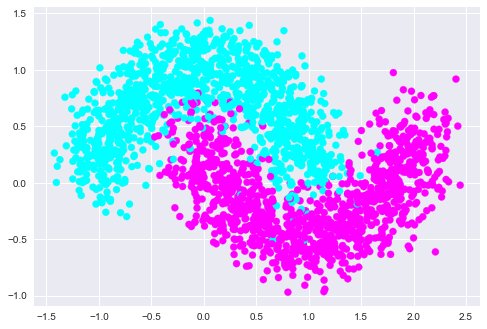

In [111]:
plt.style.use("seaborn")
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.cool)

In [55]:
def softmax(a):
    a = np.exp(a)
    a = a/np.sum(a,axis=1,keepdims=True)
    return a
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        #Creationg Neural Network Architecture
        model = {} ##Dictionary
        #First layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        #Second layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        #Third/Output layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        self.model = model
        self.activation_outputs =None
    def forward(self,x): ## Forward prop
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) +b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_hat = softmax(z3)
        self.activation_outputs = (a1,a2,y_hat)
        return y_hat
    def backward(self,x,y,learning_rate = 0.001): ## Backward prop 
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_hat = self.activation_outputs
        m = x.shape[0]
        
#         y_hat = forward(x)
        delta3 = y_hat - y;
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        #Update the Model Parameters using Gradient Descent
        self.model['W1'] -= dw1*learning_rate
        self.model['W2'] -= dw2*learning_rate
        self.model['W3'] -= dw3*learning_rate
        
        self.model['b1'] -= db1*learning_rate
        self.model['b2'] -= db2*learning_rate
        self.model['b3'] -= db3*learning_rate
        return 
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_hat = self.activation_outputs
        print("W1", W1.shape)
        print("A1", a1.shape)
        
        print("W2", W2.shape)
        print("A2", a2.shape)
        
        print("W3", W3.shape)
        print("Y_hat", y_hat.shape)
        return 

In [92]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l
def one_hot(y,depth):   ## converting the  output in oht matrix
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss =[]
    classes = 2
    Y_OHT = one_hot(Y,classes)
    for ix in range(epochs):
        
        Y_hat = model.forward(X)
        l = loss(Y_OHT,Y_hat)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [138]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [140]:
losses = train(x_train,y_train,model,500,0.001,True)

Epoch 0 Loss 0.0470
Epoch 1 Loss 0.0469
Epoch 2 Loss 0.0470
Epoch 3 Loss 0.0469
Epoch 4 Loss 0.0470
Epoch 5 Loss 0.0468
Epoch 6 Loss 0.0469
Epoch 7 Loss 0.0468
Epoch 8 Loss 0.0469
Epoch 9 Loss 0.0468
Epoch 10 Loss 0.0469
Epoch 11 Loss 0.0467
Epoch 12 Loss 0.0468
Epoch 13 Loss 0.0467
Epoch 14 Loss 0.0468
Epoch 15 Loss 0.0467
Epoch 16 Loss 0.0468
Epoch 17 Loss 0.0467
Epoch 18 Loss 0.0468
Epoch 19 Loss 0.0466
Epoch 20 Loss 0.0467
Epoch 21 Loss 0.0466
Epoch 22 Loss 0.0467
Epoch 23 Loss 0.0466
Epoch 24 Loss 0.0467
Epoch 25 Loss 0.0465
Epoch 26 Loss 0.0466
Epoch 27 Loss 0.0465
Epoch 28 Loss 0.0466
Epoch 29 Loss 0.0465
Epoch 30 Loss 0.0466
Epoch 31 Loss 0.0465
Epoch 32 Loss 0.0466
Epoch 33 Loss 0.0464
Epoch 34 Loss 0.0465
Epoch 35 Loss 0.0464
Epoch 36 Loss 0.0465
Epoch 37 Loss 0.0464
Epoch 38 Loss 0.0465
Epoch 39 Loss 0.0464
Epoch 40 Loss 0.0465
Epoch 41 Loss 0.0463
Epoch 42 Loss 0.0464
Epoch 43 Loss 0.0463
Epoch 44 Loss 0.0464
Epoch 45 Loss 0.0463
Epoch 46 Loss 0.0464
Epoch 47 Loss 0.0463
Ep

Epoch 393 Loss 0.0440
Epoch 394 Loss 0.0440
Epoch 395 Loss 0.0440
Epoch 396 Loss 0.0440
Epoch 397 Loss 0.0440
Epoch 398 Loss 0.0440
Epoch 399 Loss 0.0439
Epoch 400 Loss 0.0440
Epoch 401 Loss 0.0439
Epoch 402 Loss 0.0440
Epoch 403 Loss 0.0439
Epoch 404 Loss 0.0439
Epoch 405 Loss 0.0439
Epoch 406 Loss 0.0439
Epoch 407 Loss 0.0439
Epoch 408 Loss 0.0439
Epoch 409 Loss 0.0439
Epoch 410 Loss 0.0439
Epoch 411 Loss 0.0439
Epoch 412 Loss 0.0439
Epoch 413 Loss 0.0439
Epoch 414 Loss 0.0439
Epoch 415 Loss 0.0439
Epoch 416 Loss 0.0439
Epoch 417 Loss 0.0439
Epoch 418 Loss 0.0439
Epoch 419 Loss 0.0439
Epoch 420 Loss 0.0439
Epoch 421 Loss 0.0439
Epoch 422 Loss 0.0439
Epoch 423 Loss 0.0438
Epoch 424 Loss 0.0439
Epoch 425 Loss 0.0438
Epoch 426 Loss 0.0438
Epoch 427 Loss 0.0438
Epoch 428 Loss 0.0438
Epoch 429 Loss 0.0438
Epoch 430 Loss 0.0438
Epoch 431 Loss 0.0438
Epoch 432 Loss 0.0438
Epoch 433 Loss 0.0438
Epoch 434 Loss 0.0438
Epoch 435 Loss 0.0438
Epoch 436 Loss 0.0438
Epoch 437 Loss 0.0438
Epoch 438 

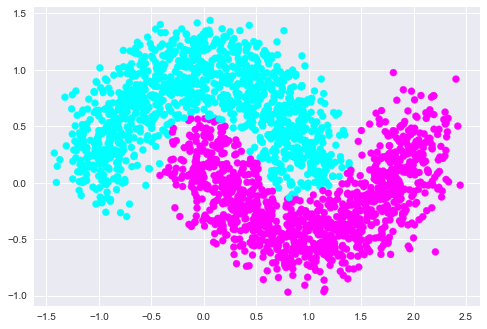

In [141]:
plt.scatter(x_train[:,0],x_train[:,1],c=model.predict(x_train),cmap=plt.cm.cool)

In [142]:
acc = np.sum(model.predict(x_train)==y_train)/y_train.shape[0]

In [143]:
acc

0.9671111111111111

In [150]:
pred = model.predict(x_test)

In [151]:
pred = pd.DataFrame(pred,columns=["label"])

In [153]:
pred.to_csv("../data/classify points/ans.csv",index=False)

In [58]:
from sklearn.datasets import make_moons

In [94]:
X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)

In [128]:
y_train.shape

(2250,)

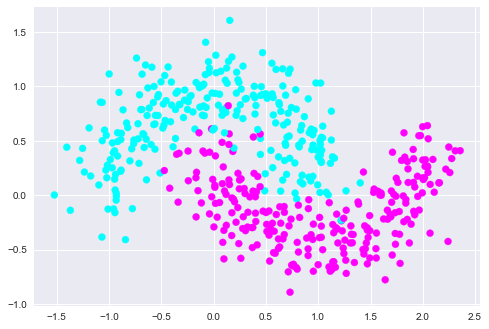

In [60]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.cool)

In [97]:
model2 = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [98]:
losses = train(X,Y,model2,500,0.001,True)

Epoch 0 Loss 0.3984
Epoch 1 Loss 0.2092
Epoch 2 Loss 0.1763
Epoch 3 Loss 0.1579
Epoch 4 Loss 0.1458
Epoch 5 Loss 0.1371
Epoch 6 Loss 0.1306
Epoch 7 Loss 0.1259
Epoch 8 Loss 0.1232
Epoch 9 Loss 0.1249
Epoch 10 Loss 0.1299
Epoch 11 Loss 0.1523
Epoch 12 Loss 0.1520
Epoch 13 Loss 0.1869
Epoch 14 Loss 0.1322
Epoch 15 Loss 0.1433
Epoch 16 Loss 0.1138
Epoch 17 Loss 0.1176
Epoch 18 Loss 0.1053
Epoch 19 Loss 0.1082
Epoch 20 Loss 0.1005
Epoch 21 Loss 0.1034
Epoch 22 Loss 0.0973
Epoch 23 Loss 0.1006
Epoch 24 Loss 0.0949
Epoch 25 Loss 0.0989
Epoch 26 Loss 0.0930
Epoch 27 Loss 0.0977
Epoch 28 Loss 0.0914
Epoch 29 Loss 0.0968
Epoch 30 Loss 0.0899
Epoch 31 Loss 0.0958
Epoch 32 Loss 0.0883
Epoch 33 Loss 0.0943
Epoch 34 Loss 0.0865
Epoch 35 Loss 0.0925
Epoch 36 Loss 0.0846
Epoch 37 Loss 0.0904
Epoch 38 Loss 0.0827
Epoch 39 Loss 0.0883
Epoch 40 Loss 0.0808
Epoch 41 Loss 0.0862
Epoch 42 Loss 0.0790
Epoch 43 Loss 0.0841
Epoch 44 Loss 0.0773
Epoch 45 Loss 0.0823
Epoch 46 Loss 0.0756
Epoch 47 Loss 0.0805
Ep

Epoch 426 Loss 0.0361
Epoch 427 Loss 0.0361
Epoch 428 Loss 0.0361
Epoch 429 Loss 0.0361
Epoch 430 Loss 0.0361
Epoch 431 Loss 0.0361
Epoch 432 Loss 0.0360
Epoch 433 Loss 0.0360
Epoch 434 Loss 0.0360
Epoch 435 Loss 0.0360
Epoch 436 Loss 0.0360
Epoch 437 Loss 0.0360
Epoch 438 Loss 0.0360
Epoch 439 Loss 0.0360
Epoch 440 Loss 0.0360
Epoch 441 Loss 0.0359
Epoch 442 Loss 0.0359
Epoch 443 Loss 0.0359
Epoch 444 Loss 0.0359
Epoch 445 Loss 0.0359
Epoch 446 Loss 0.0359
Epoch 447 Loss 0.0359
Epoch 448 Loss 0.0359
Epoch 449 Loss 0.0359
Epoch 450 Loss 0.0358
Epoch 451 Loss 0.0358
Epoch 452 Loss 0.0358
Epoch 453 Loss 0.0358
Epoch 454 Loss 0.0358
Epoch 455 Loss 0.0358
Epoch 456 Loss 0.0358
Epoch 457 Loss 0.0358
Epoch 458 Loss 0.0358
Epoch 459 Loss 0.0357
Epoch 460 Loss 0.0357
Epoch 461 Loss 0.0357
Epoch 462 Loss 0.0357
Epoch 463 Loss 0.0357
Epoch 464 Loss 0.0357
Epoch 465 Loss 0.0357
Epoch 466 Loss 0.0357
Epoch 467 Loss 0.0357
Epoch 468 Loss 0.0357
Epoch 469 Loss 0.0356
Epoch 470 Loss 0.0356
Epoch 471 

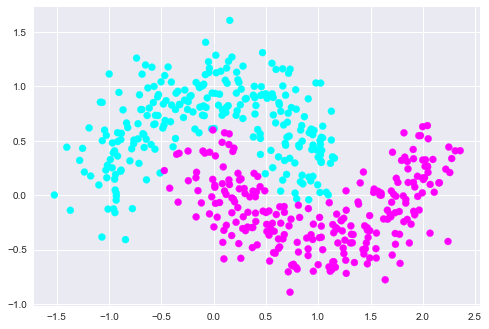

In [73]:
plt.scatter(X[:,0],X[:,1],c=model2.predict(X),cmap=plt.cm.cool)

In [74]:
acc = np.sum(model2.predict(X)==Y)/Y.shape[0]

In [75]:
acc

0.974

In [77]:
model2.summary()

W1 (2, 10)
A1 (500, 10)
W2 (10, 5)
A2 (500, 5)
W3 (5, 2)
Y_hat (500, 2)


In [79]:
a1,a2,y_hat = model2.activation_outputs

In [81]:
y_hat.shape

(500, 2)

In [82]:
y_oht = one_hot(Y,2)